In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl

mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 150

# Setting magnetic field

In this script, I will define the calibration parameters for the experiments were I will change the interactions among colloids from isotropic repulsive interactions to attractive interactions.

All the magnetic field values are in mT units.


In [3]:
B_max = 8.25

theta = [0, 10 , 20, 30, 40 , 50 , 60 ,70, 80, 90]
theta = np.array(theta)
angle_rad = theta*np.pi/180

In [4]:
def define_field(B_max, theta):
    
    B_x = []
    B_z = []
    
    for i in theta:
        print (i )
        B_x.append(B_max*np.cos(i))
        B_z.append(B_max*np.sin(i))
        
    B_x = np.array(B_x)
    B_z = np.array(B_z)
    
    return B_x, B_z

In [5]:
Bx, Bz = define_field(B_max, angle_rad)

0.0
0.17453292519943295
0.3490658503988659
0.5235987755982988
0.6981317007977318
0.8726646259971648
1.0471975511965976
1.2217304763960306
1.3962634015954636
1.5707963267948966


In [6]:
d = {'Bx': Bx, 'Bz': Bz}

df = pd.DataFrame(data=d)

df['modB'] = np.sqrt(Bx**2+Bz**2)

In [7]:
df

,Bx,Bz,modB
0,8.250000e+00,0.000000,8.25
1,8.124664e+00,1.432597,8.25
2,7.752464e+00,2.821666,8.25
3,7.144710e+00,4.125000,8.25
4,6.319867e+00,5.302998,8.25
5,5.302998e+00,6.319867,8.25
6,4.125000e+00,7.144710,8.25
7,2.821666e+00,7.752464,8.25
8,1.432597e+00,8.124664,8.25
9,5.051668e-16,8.250000,8.25


Theoretical value for the magnetic field for the experiments:

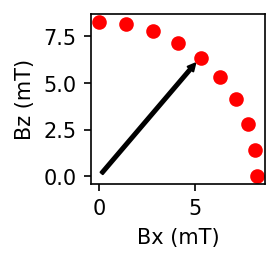

In [39]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, figsize= (1.5,1.5))



plt.plot(df.Bx, df.Bz,'o', c = 'r')
plt.xlabel('Bx (mT)')
plt.ylabel('Bz (mT)')
#plt.text(x = 1.5, y = 7, s = '|B| = 8.25 (mT)', size = 7)

arrow = mpatches.FancyArrowPatch((0, 0), (5.15, 6.2),
                                 mutation_scale=7, color = 'black')
ax.add_patch(arrow)

At maximum Bx value the error bar is high, for a 5 min experiment we have an error of 3 mT:

Text(0, 0.5, 'Bz (mT)')

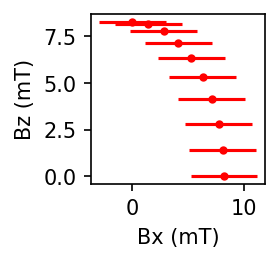

In [45]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, figsize= (1.5,1.5))

plt.errorbar(df.Bx, df.Bz, xerr = 0.01*5*60, fmt = '.', c = 'r')
plt.xlabel('Bx (mT)')
plt.ylabel('Bz (mT)')

The previous field configuration will allow me to reproduce the simulation data from Harmut Lowen.

Text(0, 0.5, '$\\theta (^\\circ)$')

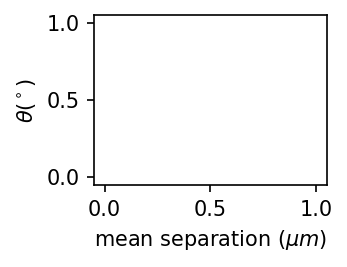

In [9]:
fig, ax = plt.subplots(1, figsize= (2,1.5))
plt.plot()
plt.xlabel(r'mean separation $(\mu m)$')
plt.ylabel(r'$\theta (^\circ)$')

## Magnetic field calibration

Here, I will write the voltage obtained experimentally to match the magnetic field values.
Magnetic field (mT) = Voltage·A +B
### To do:
To have a more accurate calibration the following data con be collected more times

In [10]:
Vx_exp1 = [10,9.57,9.25,8.53,7.45,6.25,4.83,3.31,1.72,0]
Vz_exp1 = [0,0.32,0.61,0.885,1.135,1.35,1.53,1.66,1.75,1.78]

In [11]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    fig, ax = plt.subplots(1, figsize= (2,1.5))
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('Voltage (V)')
    plt.ylabel('Magnetic field (mT)')
  
    # function to show plot
    plt.show()

In [12]:
def main( x, y ):
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 0.03557155810860557            
b_1 = 0.8359587944147839


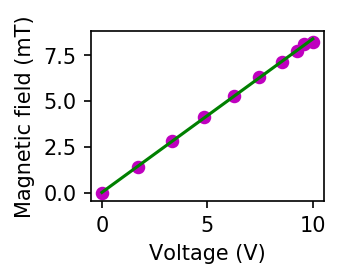

In [14]:
if __name__ == "__main__":
    main(x= np.array(Vx_exp1), y = np.array(Bx))

Estimated coefficients:
b_0 = -0.017016716278030586            
b_1 = 4.668251625378479


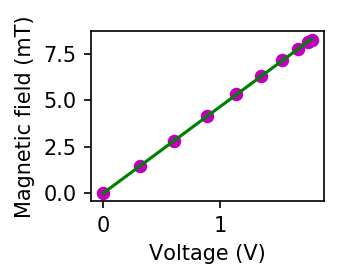

In [15]:
if __name__ == "__main__":
    main(x= np.array(Vz_exp1), y = np.array(Bz))

I noticed that the intensity values in the x-axis drop during the experimental procedure. This is due to the coils were heated by the high voltage applied and then the resistance has drop. Due to thatn the intensity in the coils decrease and hence also the magnetic field applied. I still have to characterize precisly this magnetic field drop, but for the maximum voltage value the magnetic field value decreses by 0.01 mT each second. To have more accurate data will be nice to collect sistematically the intensity values in the coils instead of the voltage applied. 